# Understand Lagrange Multiplier

## Function-based

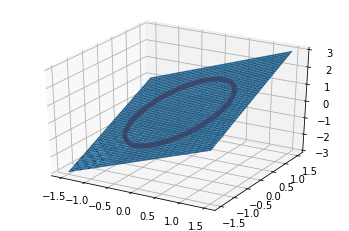

In [16]:
import numpy as np

x = np.linspace(-1.5, 1.5)

[X, Y] = np.meshgrid(x, x)

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, X + Y)

theta = np.linspace(0,2*np.pi);
R = 1.0
x1 = R * np.cos(theta)
y1 = R * np.sin(theta)

ax.plot(x1, y1, x1 + y1, 'r-', lw=5)
plt.show()

### Construct the Lagrange multiplier augmented function

To find the maximum, we construct the following function: 

Λ(x,y;λ)=f(x,y)+λg(x,y)

where 

g(x,y)=x2+y2−1=0

which is the constraint function. 

Since g(x,y)=0, we are not really changing the original function, provided that the constraint is met!

In [18]:
import numpy as np

def func(X):
    x = X[0]
    y = X[1]
    L = X[2] # this is the multiplier. lambda is a reserved keyword in python
    return x + y + L * (x**2 + y**2 - 1)

### Finding the partial derivatives

The minima/maxima of the augmented function are located where all of the partial derivatives of the augmented function are equal to zero, i.e. 

∂Λ/∂x=0, ∂Λ/∂y=0, and ∂Λ/∂λ=0

. the process for solving this is usually to analytically evaluate the partial derivatives, and then solve the unconstrained resulting equations, which may be nonlinear.

Rather than perform the analytical differentiation, here we develop a way to numerically approximate the partial derivatives.



In [21]:
def dfunc(X):
    dLambda = np.zeros(len(X))
    h = 1e-3 # this is the step size used in the finite difference.
    for i in range(len(X)):
        dX = np.zeros(len(X))
        dX[i] = h
        dLambda[i] = (func(X+dX)-func(X-dX))/(2*h);
    return dLambda

### Now we solve for the zeros in the partial derivatives

The function we defined above (dfunc) will equal zero at a maximum or minimum. It turns out there are two solutions to this problem, but only one of them is the maximum value. Which solution you get depends on the initial guess provided to the solver. Here we have to use some judgement to identify the maximum.


In [24]:
from scipy.optimize import fsolve

# this is the max
X1 = fsolve(dfunc, [1, 1, 0])
print(X1, func(X1))

# this is the min
X2 = fsolve(dfunc, [-1, -1, 0])
print(X2, func(X2))

[ 0.70710678  0.70710678 -0.70710678] 1.4142135623730951
[-0.70710678 -0.70710678  0.70710678] -1.414213562373095


# LinAlg Based 
### 1D Case
Say we have a qudratic function

$f(x) = x^2$

and a constraint
* $x = 1; g(x) = x - 1 = 0$

We can solve this via Lagrange multipliers:

$ L = x^2 + \lambda (1 - x)$

$ \frac{dL}{dx} = 2 x - \lambda = 0$ 

$ \frac{dL}{d\lambda} = 1-x  = 0$

$ \rightarrow x = 1, \lambda = 2$

In [62]:
A = np.array([[1]])
B = np.array([0])
x = np.linalg.solve(A, B)
print('Unconstrained Solution: ', x)

constraint = np.array([1])
constraint_B = np.array([1])
A_con = np.block([[A, constraint.T],[constraint, np.zeros(A.shape)]])
B_con = np.block([B, constraint_B])
x_con = np.linalg.solve(A_con, B_con)
print('Constrained Solution: ', x_con)

Unconstrained Solution:  [0.]
Constrained Solution:  [ 1. -1.]


### Higher Dimensional Case
$x = [x_1, x_2, ...]$

$f(x) = x_1^2 + \frac{1}{2} x_2^2$

* constraint: x_1 = x_2
* g(x,y) = x-y =0

In [85]:
A = np.array([[2, 0],[0, 2]])
B = np.array([14, 6])
print(A)
print(B)

x = np.linalg.solve(A, B)
print('Unconstrained solution: (0, 0)', x)

[[2 0]
 [0 2]]
[14  6]
Unconstrained solution: (0, 0) [7. 3.]


We can constrain a system until it has a unique solution:

In [117]:
constraint = np.array([[1, -1], [0, 1]])
constraint_b = np.array([0, 3])
A_con = np.block([[A, constraint.T],[constraint, np.zeros(A.shape)]])
B_con = np.block([B, constraint_b])
print(A_con)
print(B_con)
x_con = np.linalg.solve(A_con, B_con)
print('Solution:\t', x_con[:B.size])
print('Forces: \t', x_con[B.size:])

[[ 2.  0.  1.  0.]
 [ 0.  2. -1.  1.]
 [ 1. -1.  0.  0.]
 [ 0.  1.  0.  0.]]
[14  6  0  3]
Solution:	 [3. 3.]
Forces: 	 [8. 8.]


But how do we use less constraints? Whenever we try to set a row to zero, we can no longer invert it because then rows are no longer lin. independent.

In [120]:
constraint = np.array([[1, -1], [0, 0]])
constraint_b = np.array([0, 0])
A_con = np.block([[A, constraint.T],[constraint, np.zeros(A.shape)]])
B_con = np.block([B, constraint_b])
print(A_con)
print(B_con)
x_con = np.linalg.solve(A_con, B_con)
print('Solution:\t', x_con[:B.size])
print('Forces: \t', x_con[B.size:])

[[ 2.  0.  1.  0.]
 [ 0.  2. -1.  0.]
 [ 1. -1.  0.  0.]
 [ 0.  0.  0.  0.]]
[14  6  0  0]


LinAlgError: Singular matrix

So, it seems like we just use less rows for the constraint matrix:
1. Symmetry Constraint

In [122]:
A_con = np.array([[2, 0, 1], [0, 2, -1], [1, -1, 0]])
B_con = np.block([B, 0])
print(A_con)
print(B_con)
x_con = np.linalg.solve(A_con, B_con)
print('Solution:\t', x_con[:B.size])
print('Forces: \t', x_con[B.size:])

[[ 2  0  1]
 [ 0  2 -1]
 [ 1 -1  0]]
[14  6  0]
Solution:	 [5. 5.]
Forces: 	 [4.]


2. Value Constraint $x_2 = 1$

In [126]:
A_con = np.array([[2, 0, 1], [0, 2, 0], [1, 0, 0]])
B_con = np.block([B, 1])
print(A_con)
print(B_con)
x_con = np.linalg.solve(A_con, B_con)
print('Solution:\t', x_con[:B.size])
print('Forces: \t', x_con[B.size:])

[[2 0 1]
 [0 2 0]
 [1 0 0]]
[14  6  1]
Solution:	 [1. 3.]
Forces: 	 [12.]


3. Charge Group Constraint
$x_1 + x_2 = 0$

In [130]:
A_con = np.array([[2, 0, 1], [0, 2, 1], [1, 1, 0]])
B_con = np.block([B, 0])
print(A_con)
print(B_con)
x_con = np.linalg.solve(A_con, B_con)
print('Solution:\t', x_con[:B.size])
print('Forces: \t', x_con[B.size:])

[[2 0 1]
 [0 2 1]
 [1 1 0]]
[14  6  0]
Solution:	 [ 2. -2.]
Forces: 	 [10.]
